<a href="https://colab.research.google.com/github/ishidesigns/AI-Major/blob/main/AI_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as keras
from keras.layers import Input,Flatten,Dense
from keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
data=ImageDataGenerator(rescale=1./255)
im_data=data.flow_from_directory('/content/drive/MyDrive/AI October/AI Dataset/train1',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 74 images belonging to 5 classes.


In [ ]:
model=VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(model.output)
pred=Dense(5,activation='softmax')(x)

In [ ]:
model=Model(inputs=model.input, outputs=pred) #rebuilding the model

In [ ]:
model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit_generator(im_data,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - 9s 3s/step - loss: 1.9027 - accuracy: 0.2568
Epoch 2/50
3/3 [==============================] - 0s 59ms/step - loss: 0.4978 - accuracy: 0.9054
Epoch 3/50
3/3 [==============================] - 0s 59ms/step - loss: 0.3819 - accuracy: 0.8514
Epoch 4/50
3/3 [==============================] - 0s 94ms/step - loss: 0.1071 - accuracy: 0.9730
Epoch 5/50
3/3 [==============================] - 0s 72ms/step - loss: 0.0766 - accuracy: 0.9865
Epoch 6/50
3/3 [==============================] - 0s 58ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 70ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 8/50
3/3 [==============================] - 0s 68ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 9/50
3/3 [==============================] - 0s 97ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
def decode(a):
  if (a[0][0]==1):
    return('Lamborghini')
  elif (a[0][1]==1):
    return('aston martin')
  elif (a[0][2]==1):
    return('bugatti')
  elif (a[0][3]==1):
    return('ferari')
  elif (a[0][4]==1):
    return('mercedes')
  else:
    return('Invalid')

Lamborghini


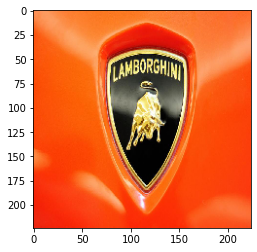

In [ ]:
# Prediction for new image
import matplotlib.pyplot as plt


path = '/content/logo1.jpg'
x = image.load_img(path,target_size=(224,224))
plt.imshow(x)

x = image.img_to_array(x)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
y = model.predict(x)
decode(y)

[[7.098239e-37 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]
[[8.998671e-26 0.000000e+00 6.846704e-37 0.000000e+00 1.000000e+00]]
[[2.5189646e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]
[[0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 1.]]
[[1.7912163e-27 7.1690385e-24 1.0000000e+00 5.4681886e-31 0.0000000e+00]]
[[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 6.493084e-25]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[1.8075179e-21 0.0000000e+00 1.8207116e-02 9.8179287e-01 0.0000000e+00]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]]
[[0. 0. 0. 1. 0.]]
[[4.9644093e-16 1.0000000e+00 2.4533422e-19 7.2641913e-28 3.7336890e-25]]
[[0. 1. 0. 0. 0.]]
[[1.0800125e-12 1.0000000e+00 7.6651108e-10 2.3965578e-14 1.4772420e-26]]
[[0. 1. 0. 0. 0.]]
[[0.000000e+00 1.000000e+00 4.891663e-22 0.000000e+00 0.000000e+00]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]]
[[1.000000e+00 0.000000e+00 0.000000e+00 1.300639e-22 0.000000e+00]]
[[1. 0. 0. 0. 0.]]


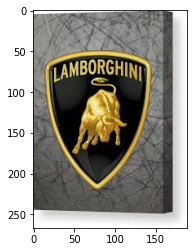

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os

images = []
target = []
y_pred = []
data = '/content/drive/MyDrive/AI October/AI Dataset'
categories = ['test1']

for category in categories:
    class_num = categories.index(category)
    path = os.path.join(data, category)
    
    for cat in os.listdir(path):
        cat1 = os.path.join(path, cat)
        for img in os.listdir(cat1):
            img_array = imread(os.path.join(cat1, img))
            images.append(img_array)
            target.append(cat)
            x = image.load_img(os.path.join(cat1, img),target_size=(224,224))
            x = image.img_to_array(x)
            x = np.expand_dims(x,axis=0)
            x = preprocess_input(x)
            y = model.predict(x)
            de_y=decode(y)
            y_pred.append(de_y)
            print(y)

images = np.array(images)
target = np.array(target)
y_pred=np.array(y_pred)
plt.imshow(img_array)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy : ", metrics.accuracy_score(target,y_pred))
confusion_matrix(target,y_pred)

Accuracy :  0.96


array([[0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [1, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 5]])

In [ ]:
print(classification_report(target,y_pred))

              precision    recall  f1-score   support

     Invalid       0.00      0.00      0.00         0
 Lamborghini       1.00      1.00      1.00         5
aston martin       1.00      1.00      1.00         5
     bugatti       1.00      1.00      1.00         5
      ferari       1.00      0.80      0.89         5
    mercedes       1.00      1.00      1.00         5

    accuracy                           0.96        25
   macro avg       0.83      0.80      0.81        25
weighted avg       1.00      0.96      0.98        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('model_new.h5')

In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15970 sha256=3e9371bb22352a422bd06c8b3e169dbeba290e70555521fdf424d5aeecf796c1
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.4MB 14.2MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 4.5MB 47.0MB/s 
     |████████████████████████████████| 112kB 58.5MB/s 
     |████████████████████████████████| 163kB 53.4MB/s 
     |████████████████████████████████| 122kB 55.1MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
  Created wheel for watchdog: filename=watchdog-1.0.1-cp36-none-any.whl size=72206 sha256=5fd4e59c11e2e93c3d083dadaf2681e0f8c20eb76f94f60e5097ab2977c972df
  Stored in directory: /root/.cache/pip/wheels/d8/ce/d8/31a48288b5728794feda5ac479fa324cc1cde4398c29eff064
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=48c1f2f73e0a20cc6def94a48ca965d0b9132e8b1cb05296d39b6e1ea01f946a
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built watchdog blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

model_new = tf.keras.models.load_model('model_new.h5')

def decode(a):
  if (a[0][0]==1):
    return('Lamborghini')
  elif (a[0][1]==1):
    return('aston martin')
  elif (a[0][2]==1):
    return('bugatti')
  elif (a[0][3]==1):
    return('ferari')
  elif (a[0][4]==1):
    return('mercedes')
  else:
    return('wrong')

st.title('LOGO PREDICTION')
st.write('Using Transfer Learning(VGG-16)')
# a = st.text_input("Write your Name","---")
# st.write("My name is ",a)
upload = st.file_uploader("Choose an Image")
if upload is not None:
  img = Image.open(upload)
  st.image(img,caption = 'UPLOADED IMAGE',use_column_width=True)

  if st.button('PREDICT'):
    st.write("RESULT....")
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    x = preprocess_input(x)
    y = model_new.predict(x)
    y_out = decode(y)
    st.write(f"Predicted Output : {y_out}")


Writing app.py


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url

'http://87834da24275.ngrok.io'

In [ ]:
!streamlit run app.py &


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.121.45:8501

2020-12-16 17:48:46.510556: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-16 17:48:47.720845: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-16 17:48:47.725971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-16 17:48:47.726537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-16 17:48:47.726596: I tensorflow/stream_executor/platform/default/dso_load